### 실습 | 와인 종류 예측하기 : 데이터 확인과 실행

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=12))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0)

score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {score[1]}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
41/41 [==============================] - 0s 1ms/step - loss: 0.1411 - acc: 0.9492
Test accuracy : 0.9492307901382446


In [3]:
from keras.callbacks import ModelCheckpoint

modelpath = './data/model/{epoch:02d}-{val_acc:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=500, 
                    validation_split=0.25, 
                    verbose=0, 
                    callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print(f"Test accuracy : {score[1]}")


Epoch 1: saving model to ./data/model\01-0.9462.keras

Epoch 2: saving model to ./data/model\02-0.9469.keras

Epoch 3: saving model to ./data/model\03-0.9477.keras

Epoch 4: saving model to ./data/model\04-0.9500.keras

Epoch 5: saving model to ./data/model\05-0.9485.keras

Epoch 6: saving model to ./data/model\06-0.9485.keras

Epoch 7: saving model to ./data/model\07-0.9477.keras

Epoch 8: saving model to ./data/model\08-0.9485.keras

Epoch 9: saving model to ./data/model\09-0.9508.keras

Epoch 10: saving model to ./data/model\10-0.9523.keras

Epoch 11: saving model to ./data/model\11-0.9515.keras

Epoch 12: saving model to ./data/model\12-0.9523.keras

Epoch 13: saving model to ./data/model\13-0.9515.keras

Epoch 14: saving model to ./data/model\14-0.9523.keras

Epoch 15: saving model to ./data/model\15-0.9531.keras

Epoch 16: saving model to ./data/model\16-0.9538.keras

Epoch 17: saving model to ./data/model\17-0.9538.keras

Epoch 18: saving model to ./data/model\18-0.9531.keras



In [4]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,acc,val_loss,val_acc
0,0.120129,0.955094,0.150516,0.946154
1,0.118907,0.953811,0.152773,0.946923
2,0.119259,0.957403,0.148615,0.947692
3,0.115980,0.956633,0.144788,0.950000
4,0.116229,0.955094,0.144982,0.948462
5,0.118050,0.957403,0.146488,0.948462
6,0.114368,0.957916,0.144930,0.947692
7,0.111376,0.956377,0.141452,0.948462
8,0.112131,0.958943,0.141795,0.950769
9,0.111346,0.959199,0.139898,0.952308


### 실습 | 와인의 종류 예측하기 : 그래프 표현

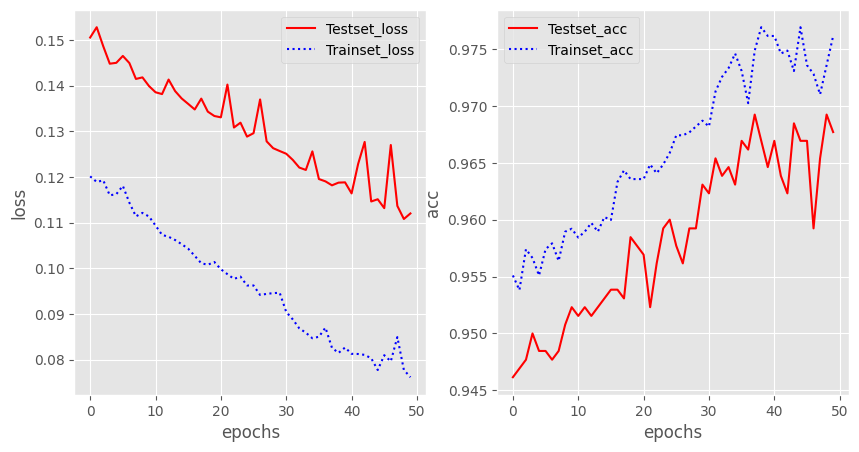

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

y_vacc = hist_df['val_acc']
y_acc = hist_df['acc']
epoch = np.arange(len(y_loss))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epoch, y_vloss, 'r-', markersize=2, label='Testset_loss')
plt.plot(epoch, y_loss, 'b:', markersize=2, label='Trainset_loss')
plt.legend()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(epoch, y_vacc, 'r-', markersize=2, label='Testset_acc')
plt.plot(epoch, y_acc, 'b:', markersize=2, label='Trainset_acc')
plt.legend()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('acc')

plt.show();

In [10]:
# 학습의 자동 중단
from keras.callbacks import EarlyStopping

modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=0, 
                    callbacks=[early_stopping_callbacks, checkpointer])

score = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {score[1]}')

d:\python_project\파이썬 데이터분석 폴더\every_deeplearning\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 0s 3ms/step - loss: 0.0641 - acc: 0.9808
Test Accuracy : 0.9807692170143127
